### <center> **Práctica 5: Introducción al análisis frecuencial de señales**
### <center>**Bioseñales y sistemas**
#### <center>Maria Alejandra Escobar - C.C 1004425012
#### <center>Juan Manuel Martínez - C.C 1007739919

### Procedimiento

4.1 Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. (10%)

In [20]:
#Importación de librerías necesarias para el desarrollo de la práctica
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

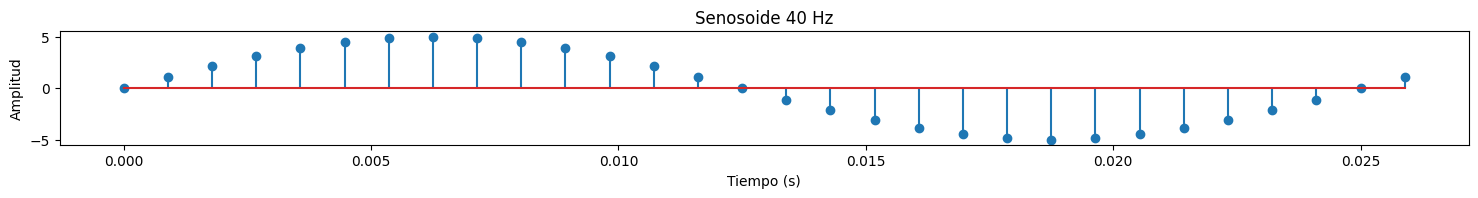

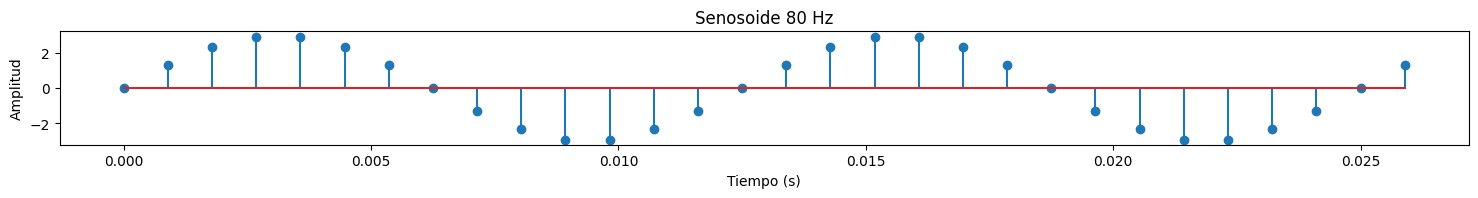

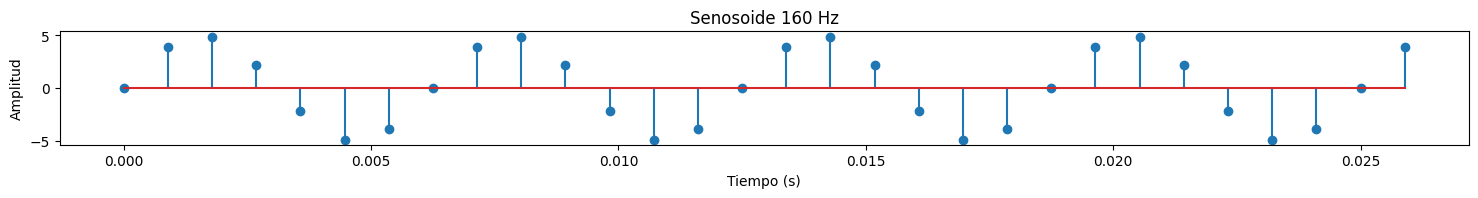

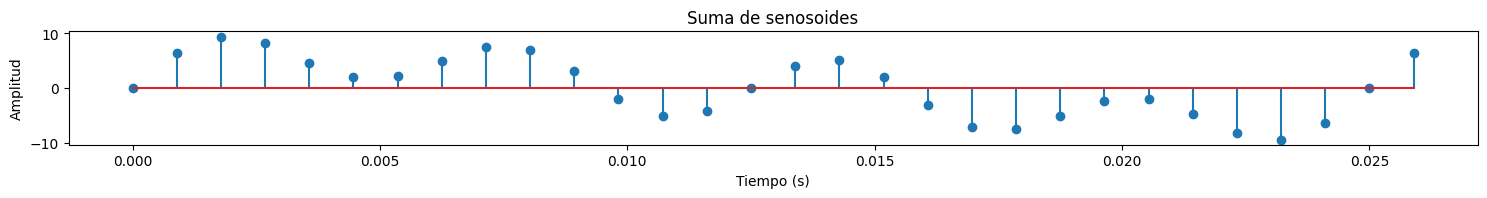

In [21]:
# Frecuencias 40, 80, 160
#m.c.m de las frecuencias es 160 Hz, es decir es la frecuencia fundamental
#Fs ≥ 2 * Fo 
Fs = 7*160  # Frecuencia de muestreo, mínimo 2 veces la frecuencia máxima, común para todos
T = 1/Fs # Periodo de muestreo
Fo = 40 # Frecuencia fundamental de la señal
Tp = 1/Fo # Periodo de la señal

t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la señal con duración de Tp más una muestra T
x1 = 5*np.sin(2*np.pi*40*t)
x2 = 3*np.sin(2*np.pi*80*t)
x3 = 5*np.sin(2*np.pi*160*t)
xt=(x1+x2+x3)

fig1=plt.figure(figsize=(40,5))
plt.subplot(3,2,1)
plt.stem(t, x1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Senosoide 40 Hz')
plt.show()

fig2=plt.figure(figsize=(40,5))
plt.subplot(3,2,2)
plt.stem(t, x2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Senosoide 80 Hz')
plt.show()

fig3=plt.figure(figsize=(40,5))
plt.subplot(3,2,3)
plt.stem(t, x3)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Senosoide 160 Hz')
plt.show()

fig4=plt.figure(figsize=(40,5))
plt.subplot(3,2,6)
plt.stem(t, xt)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Suma de senosoides')
plt.show()

4.2 Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia. Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos de la señal). (10%)

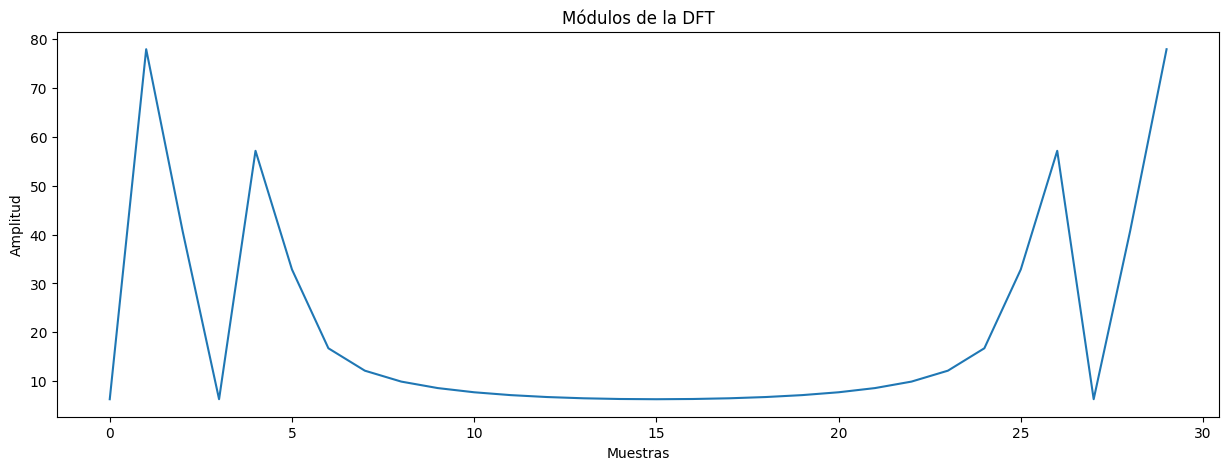

In [22]:
X = np.fft.fft(xt)
fig = plt.figure(figsize=(15,5))
plt.plot(abs(X))
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

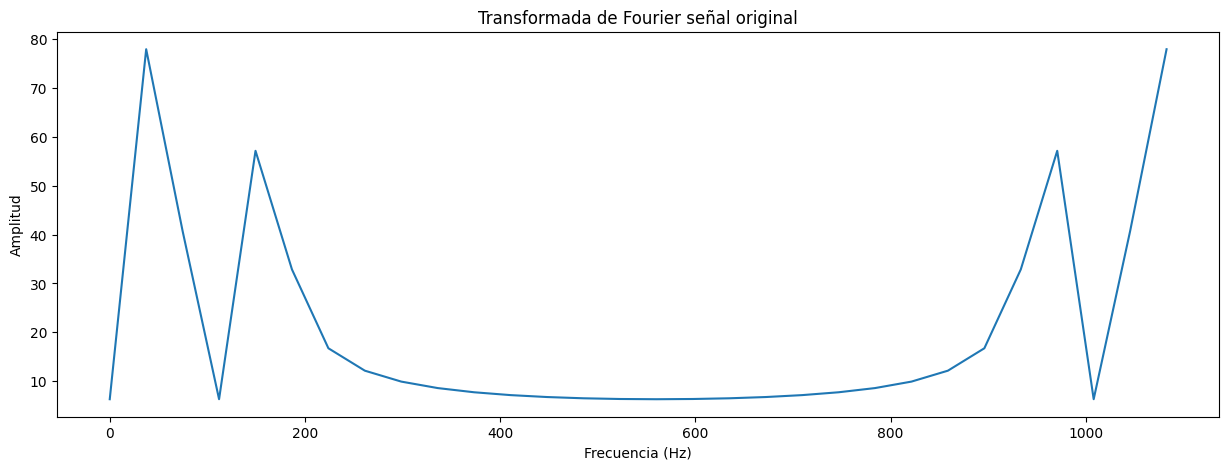

In [23]:
#Para mostrar el espectro en frecuencia, se debe realizar la conversión del eje x.
N = len(X)
F = np.arange(0,N)*Fs/N
fig1 = plt.figure(figsize=(15,5))
plt.plot(F,abs(X))
plt.title('Transformada de Fourier señal original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

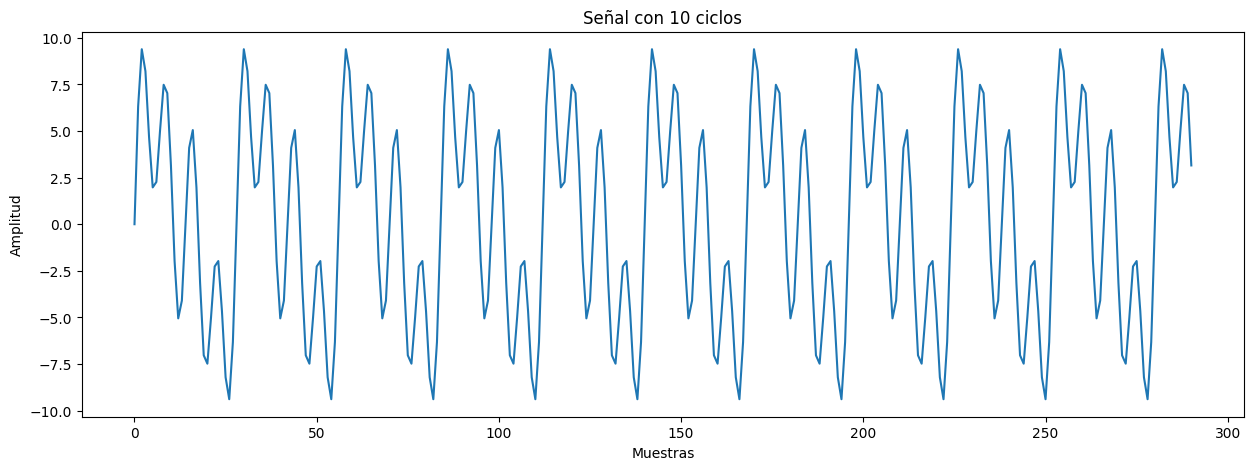

In [24]:
# Identificación de las frecuencias que componen la señal ( 10 periodos )
t2=np.arange(0,10*(Tp+T),T)
x6=5*np.sin(2*np.pi*40*t2)
x7=3*np.sin(2*np.pi*80*t2)
x8=5*np.sin(2*np.pi*160*t2)
xt2=(x6+x7+x8)
fig1 = plt.figure(figsize=(15,5))
plt.plot(xt2)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal con 10 ciclos')
plt.show()

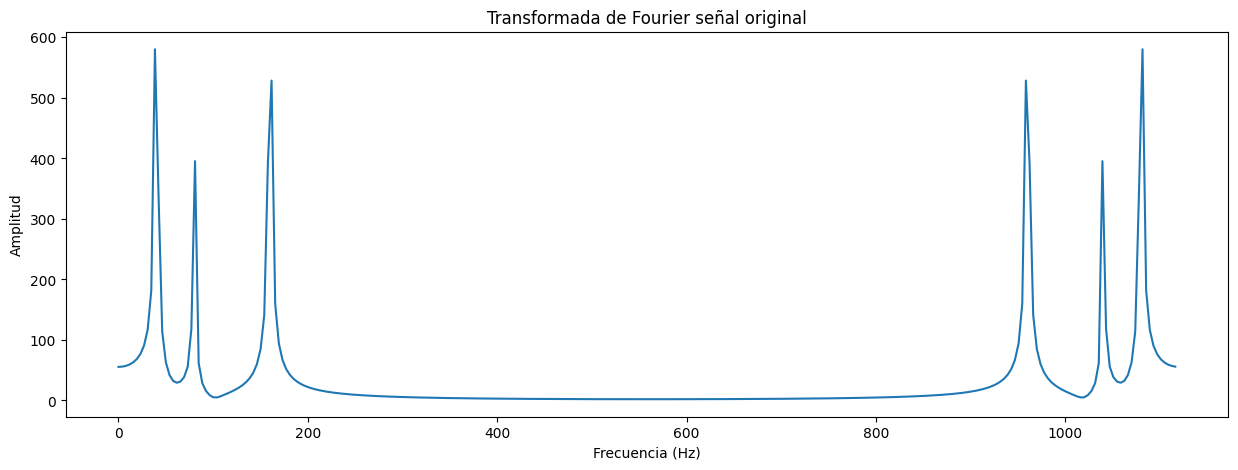

In [25]:
#Se calcula la transformada rapida de fourier de la señal con 10 ciclos.
t_fourier=np.fft.fft(xt2)
N = len(t_fourier)
F = np.arange(0,N)*Fs/N
fig1 = plt.figure(figsize=(15,5))
plt.plot(F,abs(t_fourier))
plt.title('Transformada de Fourier señal original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

En el espectro de la frecuencia de la señal de suma de senosoides de frecuencias de 40Hz, 80Hz y 160Hz, se identifica que ésta se compone de frecuencias menores a 200 Hz y frecuencias mayores a 900 Hz hasta valores de 1150 Hz aproximadamente.

4.3 Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier. Aplíquelo a la señal anterior. (10%)

C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\Juan Manuel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


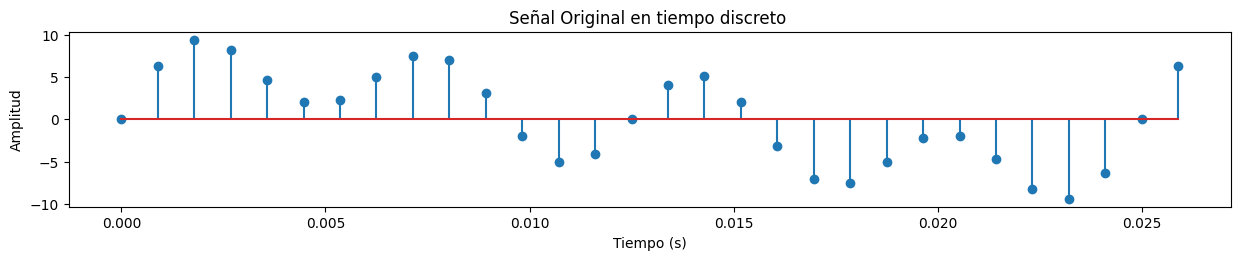

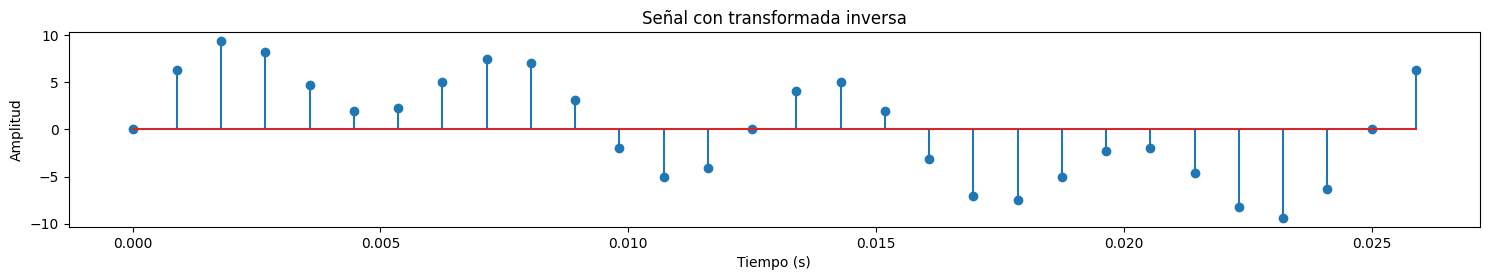

In [26]:
ift_resultado = np.fft.ifft(X)

fig1=plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
plt.stem(t, xt)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Original en tiempo discreto ')

fig2=plt.figure(figsize=(15,5))
plt.subplot(2, 1, 2)
plt.stem(t, ift_resultado)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal con transformada inversa')

plt.tight_layout()
plt.show()

4.4 ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué? (10%)
###### *F1 = np.fft.fft(x);*
###### *F2 = np.zeros((len(F1)));*
###### *F2[9:13] = F1[9:13];*
###### *xr = np.fft.ifft(F2);*
###### *fig = plt.figure()*
###### *ax = fig.add_subplot(111)*
###### *ax.plot(t, np.real(xr))*
###### *ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');*
###### *plt.show()*

Extraiga de manera similar cada una de las componentes de la señal.

El código proporcionado efectúa un proceso de filtrado en el dominio de la frecuencia a una señal empleando la Transformada de Fourier Discreta (DFT) y su inversa, la Transformada Inversa de Fourier Discreta (IFFT). Este código realiza el filtrado en el dominio de la frecuencia al seleccionar y preservar un conjunto específico de componentes de frecuencia en la DFT, lo que resulta en una señal filtrada en el dominio del tiempo. Este método de filtrado se fundamenta en la noción de que ciertas frecuencias deben ser suprimidas o reducidas, mientras que otras se mantienen intactas con el propósito de lograr el procesamiento deseado.

F1 = np.fft.fft(x); # Esta linea calcula la DFT de la señal x utilizando la respectiva función.

F2 = np.zeros((len(F1)));

F2[9:13] = F1[9:13]; #En esta línea de código se realiza un tipo de filtro que se enfoca en ciertas frecuencias. Se eligen y copian las frecuencias en el rango de los índices 9 a 12 (incluyendo estos números) de la señal F1. Todas las demás frecuencias se establecen en cero. Esto significa que se eliminan o reducen las frecuencias que están fuera de ese rango y se mantienen las frecuencias en el rango de 9 a 12.

xr = np.fft.ifft(F2); #Se calcula la Transformada Inversa de Fourier Discreta (IFFT) de F2 para obtener la señal filtrada en el dominio del tiempo. La IFFT convierte las componentes de frecuencia filtradas nuevamente en una señal en el dominio del tiempo. El resultado es la señal filtrada.

Las siguiente lineas de cogigo son usadas para graficar la señal:

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(t, np.real(xr))

ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()

Ahora, se aplica este codigo de manera similar para filtar las componentes de la señal generada con cada frecuencia:

[8, 9, 10, 11, 12]
[21, 22, 23]
[37, 38, 39, 40, 41, 42, 43, 44]
Componentes de la señal extraidos a partir del filtro:


Text(0.5, 1.0, 'Componente a 160Hz')

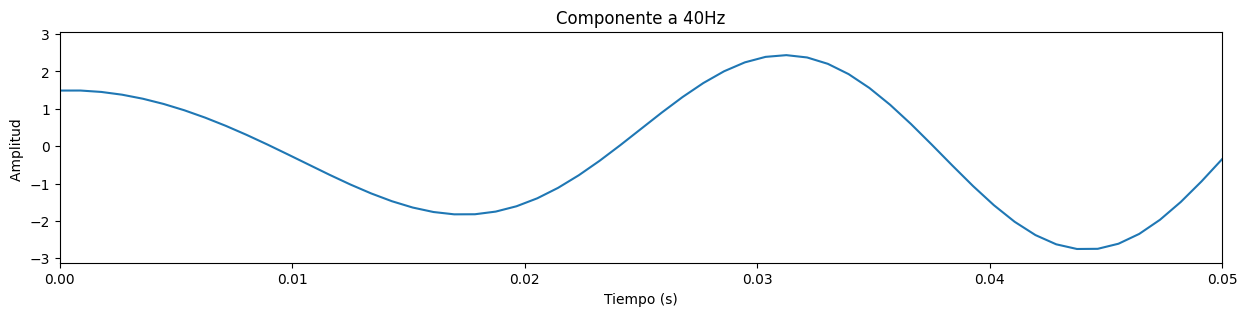

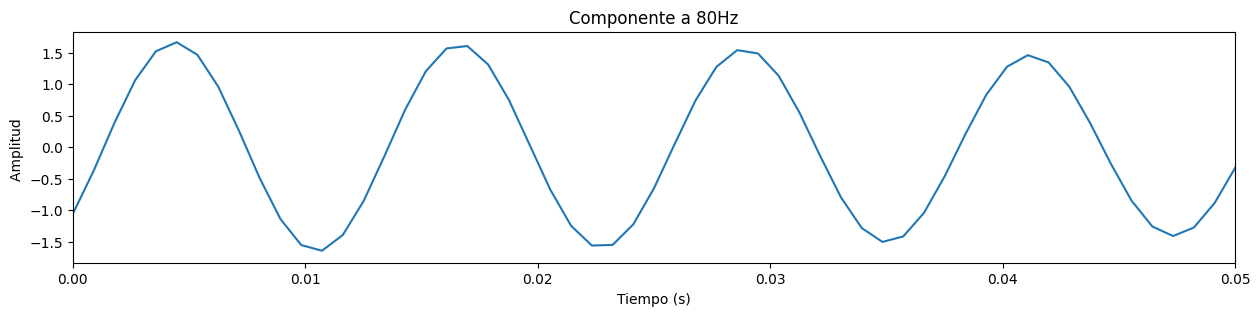

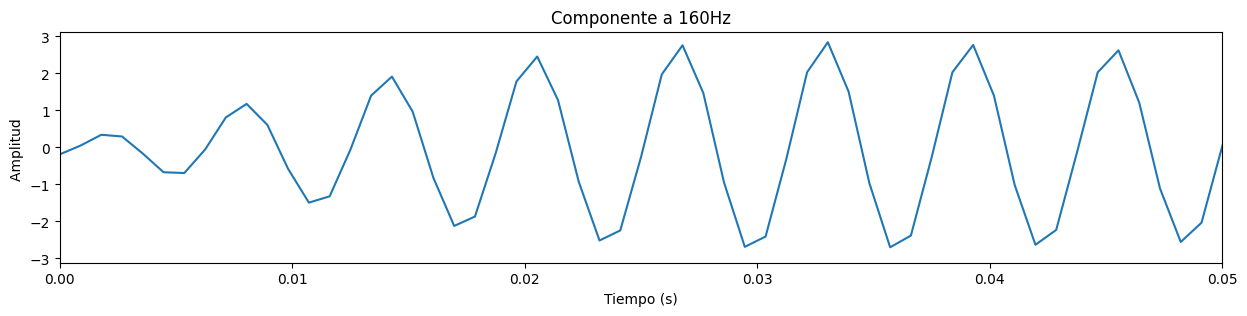

In [27]:
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N

rango1 = np.where((Fmitad >= 30) & (Fmitad<= 50))[0].tolist()
rango2=np.where((Fmitad >= 80) & (Fmitad<= 90))[0].tolist()
rango3=np.where((Fmitad>= 140) & (Fmitad <= 170))[0].tolist()

print(rango1)
print(rango2)
print(rango3)

F1 = np.zeros_like(t_fourier,dtype=complex)
F1[rango1] = t_fourier[rango1]
F2 = np.zeros_like(t_fourier,dtype=complex)
F2[rango2] = t_fourier[rango2]
F3 = np.zeros_like(t_fourier,dtype=complex)
F3[rango3] = t_fourier[rango3]


xr1 = np.fft.ifft(F1)
xr2 = np.fft.ifft(F2)
xr3 = np.fft.ifft(F3)

A = "Componentes de la señal extraidos a partir del filtro:"
print(A)
fig7 = plt.figure(figsize=(15,3))
plt.xlim(0,0.05)
plt.plot(t2,np.real(xr1))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud ')
plt.title('Componente a 40Hz')
fig8 = plt.figure(figsize=(15,3))
plt.xlim(0,0.05)
plt.plot(t2,np.real(xr2))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud ')
plt.title('Componente a 80Hz')
fig9 = plt.figure(figsize=(15,3))
plt.xlim(0,0.05)
plt.plot(t2,np.real(xr3))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud ')
plt.title('Componente a 160Hz')

4.5 El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elección del solapamiento y el ancho de la ventaja) (25%)

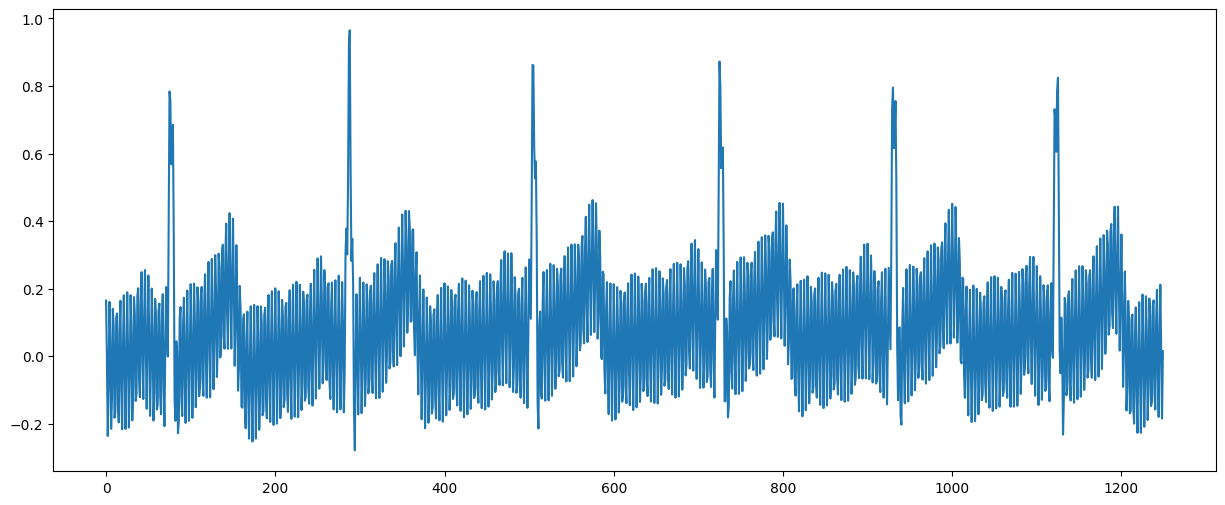

In [50]:
#Cargar archivo .mat
data = sio.loadmat('senecg.mat')
ecg_signal = data['ECG'] # ECG es el nombre de la variable que contiene el array de la senal
plt.figure(figsize=(15,6))
plt.plot(ecg_signal)

C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_11440\1421496072.py:7: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  window = hann(window_size)  # Utiliza una ventana de Hann


<function matplotlib.pyplot.show(close=None, block=None)>

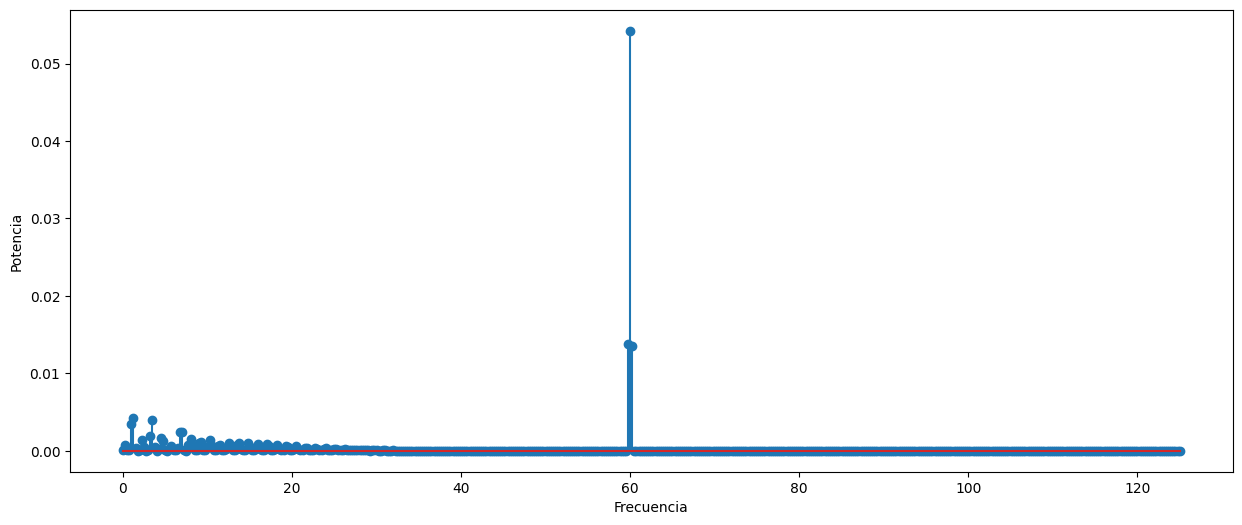

In [29]:
from scipy.signal import welch, hann

ecg = ecg_signal.T
fs = 250
window_size = 1000 # Tamaño de la ventana de 1000 muestras
overlap = window_size // 2  # Solapamiento del 50%
window = hann(window_size)  # Utiliza una ventana de Hann

# Calcula el periodograma de Welch
f, pxx = welch(ecg, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

plt.figure(figsize=(15,6))
plt.stem(f, pxx.T)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.show


En el periodograma de Welch realizado para la señal ECG presentada muestra la frecuencias presentes en la señal y su potencia. De esta manera la imágen muestra una alta potencia en frecuencias cercanas a los 60 Hz. Esto tiene mucho que ver con la interferencia de la red eléctrica, ya que las señales ECG en general manejan frecuencias bajas. Es por esto que es necesario filtrar la banda de frecuencia de los 60 Hz.

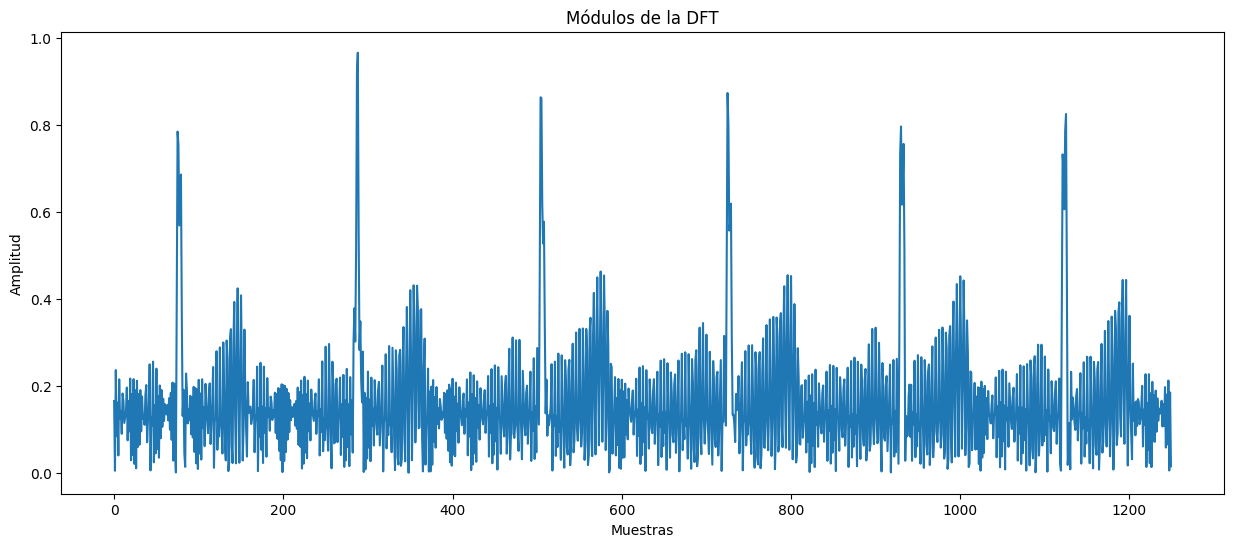

In [48]:
fft_e = np.fft.fft(ecg_signal)
fft_ecg = abs(fft_e)
plt.figure(figsize=(15, 6))
plt.plot(fft_ecg)
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()



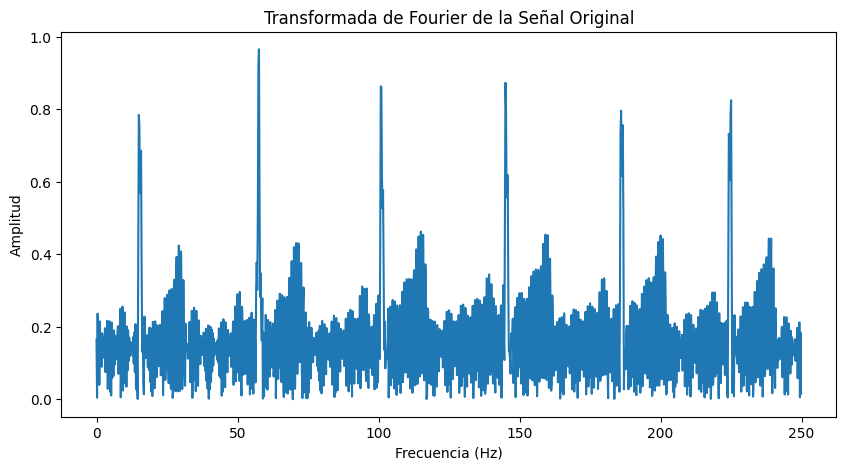

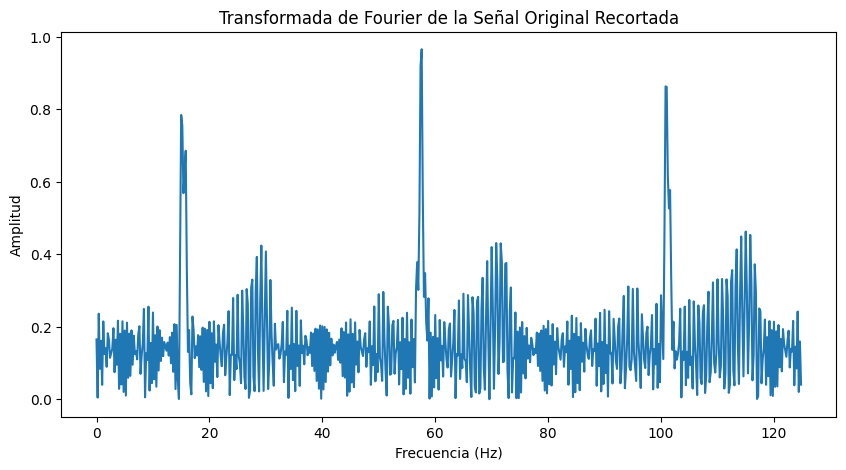

In [46]:
N = len(fft_ecg)
fs = 250
F = np.arange(0, N) * fs / N

# Visualizar la Transformada de Fourier de la señal original
fig_transformada_original = plt.figure(figsize=(10, 5))
plt.plot(F, abs(fft_ecg))
plt.title('Transformada de Fourier de la Señal Original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

# Recortar la Transformada de Fourier para mostrar solo la mitad
Nmitad = int(np.ceil(N / 2))
Fmitad = np.arange(0, Nmitad) * fs / N
X10mitad = fft_ecg[0:Nmitad]

# Visualizar la Transformada de Fourier recortada
fig_transformada_recortada = plt.figure(figsize=(10, 5))
plt.plot(Fmitad, abs(X10mitad))
plt.title('Transformada de Fourier de la Señal Original Recortada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()